<a href="https://colab.research.google.com/github/TienNguyen0712/student-alcohol-consumption-data-mining/blob/main/notebooks/05_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🎯 **Problem Formulation (Định nghĩa mục tiêu)**

**Mục tiêu:** Mục tiêu của bài toán là xây dựng một mô hình phân cụm nhằm phân chia thành các nhóm học sih dựa trên các đặc trên các đặc trưng về thời gian học tập, sử dụng cồn, số buổi vắng học

**Mục tiêu phân cụm:** Xác định các yếu tố có thể ảnh hưởng đến điểm số, phân cụm nhóm học sinh để có thể đánh giá các đặc điểm của từng nhóm

**Mô hình phân cụm được sử dụng:**

- K-Mean
- Hierarchical Clustering

## 🔎 **Data Preparation (Chuẩn bị dữ liệu phân cụm)**

**Các đặc trưng được lựa chọn cho mô hình phân cụm**

- **Thông tin cá nhân:** `sex`
- **Thông tin thời gian:** `studytime`, `failures`
- **Thông tin sinh hoạt:** `activities`, `famrel`
- **Thông tin sức khỏe tinh thần:** `freetime`, `goout`, `Dalc`, `Walc`, `health`, `absences`



In [67]:
col_selects = ['sex', 'studytime', 'failures', 'activities',
               'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
               'absences']

In [68]:
import pandas as pd

student_merge = pd.read_csv('student_merge.csv')
student_merge.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,traveltime,studytime,failures,famrel,goout,Dalc,Walc,health,absences,freetime
0,GP,F,15,R,GT3,T,1,1,at_home,other,...,2.0,4.0,0.5,3.0,2.0,1.0,1.0,1.0,4.0,1.0
1,GP,F,15,R,GT3,T,1,1,other,other,...,3.0,1.0,1.0,5.0,5.0,1.0,1.0,1.0,2.0,5.0
2,GP,F,15,R,GT3,T,1,1,other,other,...,1.0,2.0,1.0,3.0,4.0,2.0,4.0,5.0,2.0,3.0
3,GP,F,15,R,GT3,T,2,2,at_home,other,...,1.0,1.0,0.0,4.0,1.0,1.0,1.0,2.0,8.0,3.0
4,GP,F,15,R,GT3,T,2,4,services,health,...,1.0,3.0,0.0,4.0,2.0,1.0,1.0,5.0,2.0,3.0


In [69]:
X = student_merge[col_selects]

## 📐 **Optimal K (Tối ưu cụm K)**

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object", "category"]).columns

preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

X_processed = preprocess.fit_transform(X) # Tách và chuẩn hóa


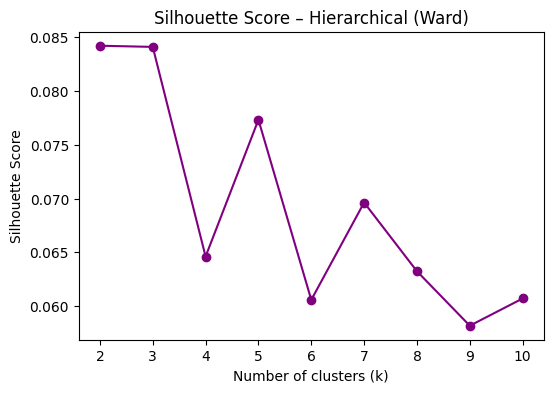

In [71]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Vẽ silhouette

K = range(2, 11)
sil_scores = []

X_dense = X_processed

for k in K:
    agg = AgglomerativeClustering(
        n_clusters=k,
        linkage="ward"
    )
    labels_a = agg.fit_predict(X_dense)
    score = silhouette_score(X_dense, labels_a)
    sil_scores.append(score)


plt.figure(figsize=(6, 4))
plt.plot(K, sil_scores, marker="o", color="purple")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score – Hierarchical (Ward)")
plt.show()


**Nhận xét**

Sihouette Score dao động trong khoảng 0.058 - 0.085

- **Cao nhất**
  - k = 2 ~ 0.084
  - k = 3 ~ 0.084

- **Các k lớn hơn**
  - k = 5 ~ 0.077
  - k = 7 ~ 0.069

-> Không có đỉnh sắc nét khi k tăng

Ta rút ra kết luận phân cụm yếu đối với việc sử dụng Hierarchical không phù hợp với bộ dữ liệu này.
- Dữ liệu nhiều phân loại
- Quan hệ phi thuyết
- Cụm "hành vi xã hội"

Hành vi uống rượu của học sinh thành nhóm rạch ròi mà là liên tục. DO đó mà điểm có thể sẽ rất thấp

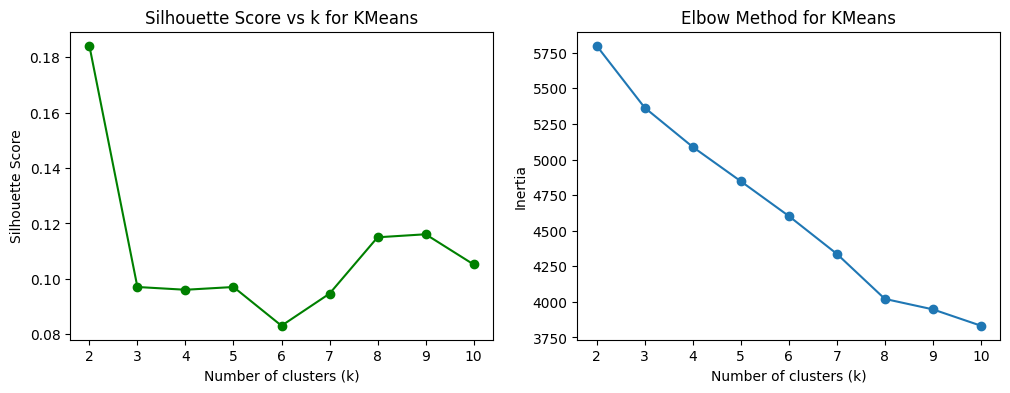

In [72]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

K = range(2, 11)
inertias = []
sil_scores = []

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels_k = km.fit_predict(X_processed)
    km.fit(X_processed)
    score = silhouette_score(X_processed, labels_k)
    sil_scores.append(score)
    inertias.append(km.inertia_)

# Vẽ silhouette cho Kmean

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(K, sil_scores, marker="o", color="green")
axes[0].set_title("Silhouette Score vs k for KMeans")
axes[0].set_xlabel("Number of clusters (k)")
axes[0].set_ylabel("Silhouette Score")

axes[1].plot(K, inertias, marker="o")
axes[1].set_title("Elbow Method for KMeans")
axes[1].set_xlabel("Number of clusters (k)")
axes[1].set_ylabel("Inertia")

plt.show()

**Nhận xét**

- Silhouette Score: dao động từ 0.08 - 0.18 cải thiện đáng kể so với phương pháp trên

- Với k = 2 thì điểm cũng cao vượt trội

-> Không có xu hướng tăng dần theo k
- Elbow ta quan sát:
- Sau k = 2 thì giảm mạnh ta quan sát thấy độ dốc dần
- Sở dĩ các điểm này thay đổi nhiều là do bộ dữ liệu là "hành vi của con người"

## 🤖 **Clustering Model (Mô hình phân cụm)**

In [73]:
from sklearn.cluster import AgglomerativeClustering

hclust = AgglomerativeClustering(
    n_clusters=2,
    linkage="ward"
)

labels_h = hclust.fit_predict(X_processed)
student_merge["cluster_h"] = labels_h


In [74]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_processed)

feature_names = preprocess.get_feature_names_out()

student_merge["cluster"] = labels

In [75]:
from sklearn.metrics import silhouette_score

print("KMeans:", silhouette_score(X_processed, labels))
print("Hierarchical:", silhouette_score(X_processed, labels_h))


KMeans: 0.18419023902481582
Hierarchical: 0.08420046054456587


**Nhận xét**

So sánh điểm của hai mô hình ta cũng có thể thấy Kmeans phù hợp với bộ dữ liệu hơn. Đồng thời ta cũng có thể lựa chọn số k để phân cụm thành 2 cụm

## 📊 **Visualization (Trực quan hóa)**

In [76]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2, random_state=42)
X_2d = pca_2d.fit_transform(X_processed)

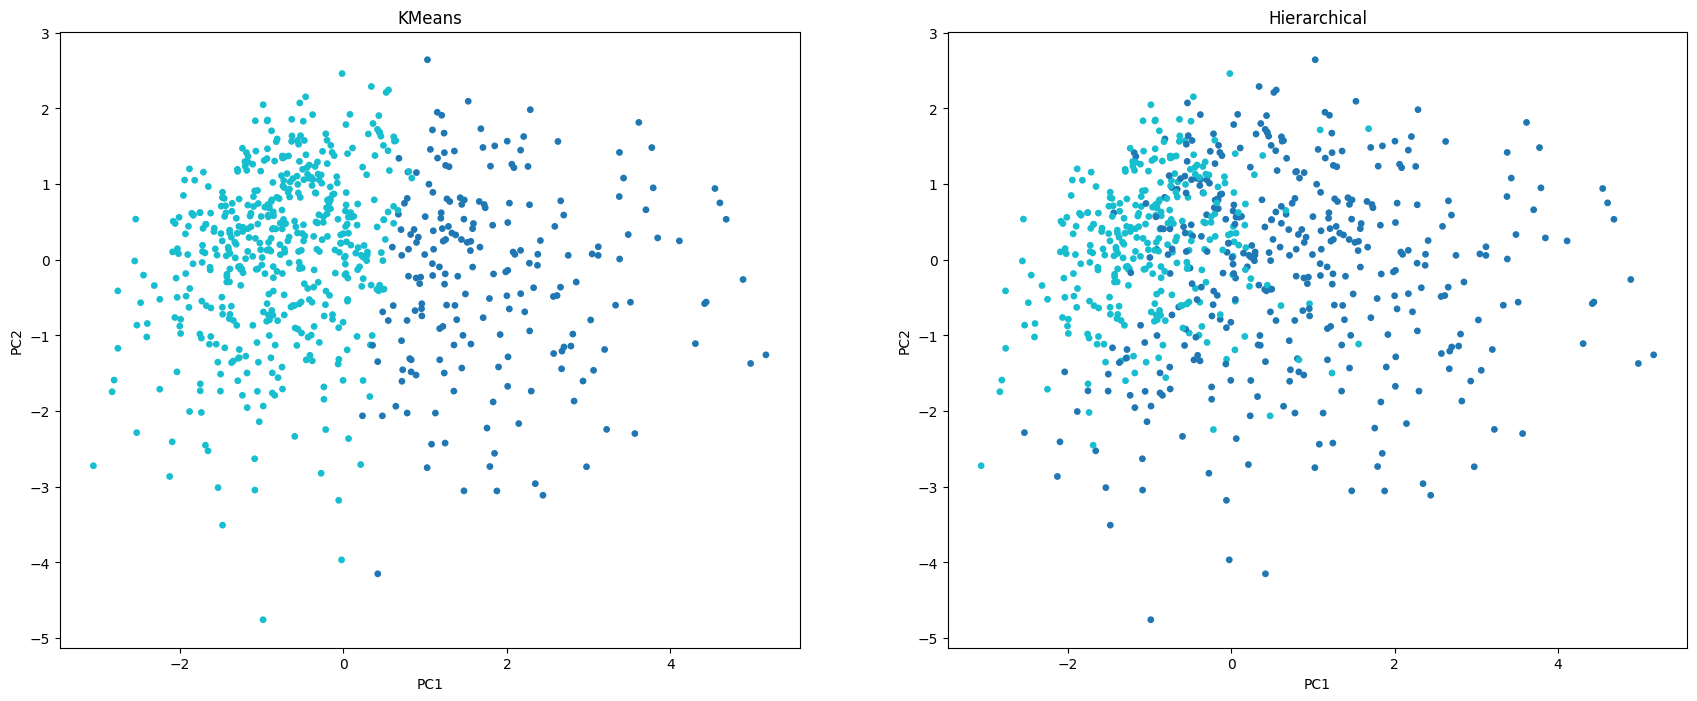

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(21, 8))

axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap="tab10", s=15)
axes[0].set_title("KMeans")

axes[1].scatter(X_2d[:, 0], X_2d[:, 1], c=labels_h, cmap="tab10", s=15)
axes[1].set_title("Hierarchical")

for ax in axes:
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")

plt.show()


Quan sát hai biểu đô ta có thể thấy được K-Means phân cụm rõ hơn và ranh giới giữa các cụm rõ hơn, độ ổn định của cụm tốt. Và kết luận rằng ta có 3 cụm hành vi tất cả

## 🧬 **Cluster Analysis (Phân tích cụm)**

In [78]:
for col in cat_cols:
    print(student_merge.groupby("cluster")[col].value_counts(normalize=True))


cluster  sex
0        M      0.706468
         F      0.293532
1        F      0.700624
         M      0.299376
Name: proportion, dtype: float64
cluster  activities
0        yes           0.567164
         no            0.432836
1        no            0.546778
         yes           0.453222
Name: proportion, dtype: float64


In [79]:
student_merge.groupby("cluster")[num_cols].mean()


,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
cluster,,,,,,,,,
0,1.582090,0.497512,3.838308,3.579602,3.995025,2.402985,3.743781,3.830846,7.621891
1,2.068607,0.217256,3.979210,3.022869,2.833680,1.117464,1.655925,3.414761,4.673597


In [81]:
student_merge.groupby("cluster")[num_cols].median()

,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
cluster,,,,,,,,,
0,1.0,0.0,4.0,4.0,4.0,2.0,4.0,4.0,6.0
1,2.0,0.0,4.0,3.0,3.0,1.0,1.0,4.0,4.0


In [80]:
student_merge.groupby("cluster")[num_cols].std()

,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
cluster,,,,,,,,,
0,0.722480,0.783418,0.988673,1.032537,0.949987,1.187136,0.943543,1.356003,8.265974
1,0.818072,0.543995,0.922849,1.018320,1.058393,0.338850,0.810485,1.441574,6.026289


## 📝 **Conclusion (Kết luận)**

Ta quan sát thấy rằng bộ dữ liệu được chia thành 2 cụm rõ ràng được quyết định bởi các đặc trưng:
- **Thông tin cá nhân:** `sex`
- **Thông tin thời gian:** `studytime`, `failures`
- **Thông tin sinh hoạt:** `activities`, `famrel`
- **Thông tin sức khỏe tinh thần:** `freetime`, `goout`, `Dalc`, `Walc`, `health`, `absences`

**Diễn giải các cụm**

**Cụm 1** *(Học ít - tàn suất dùng rượu nhiều - vắng học nhiều)*

- Cụm này thời gian học trung bình ít hơn so với cụm 2
- Cụm này cũng có thười gian rảnh nhiều hơn cụm dưới do đó mà thời gian ra ngoài và sử dụng rượi nhiều hơn hẳn so với cụm 2
- Việc sử dụng cồn đặc biệt là vào cuối tuần chiếm chủ yếu và đặc biệt việc vắng mặt ở các buổi học nhiều hơn cả cụm 2


**Cụm 2** *Học nhiều - Tần suất dùng rượu ít - vắng học ít*

- Cụm này có thời gian học nhiều hơn so với cụm 1
- Thời gian rảnh cũng như ra ngoài ít hơn hẳn so với cụm 1  
- Tân suẩy sử dụng cồn cũng ít đi một cách đáng kể và số buổi vắng mặt ít hơn hản cụm 1